### K-Nearest Neighbor Classification for Glass Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Glass Dataset

In [3]:
gd = pd.read_csv('glass.csv')

In [4]:
gd.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


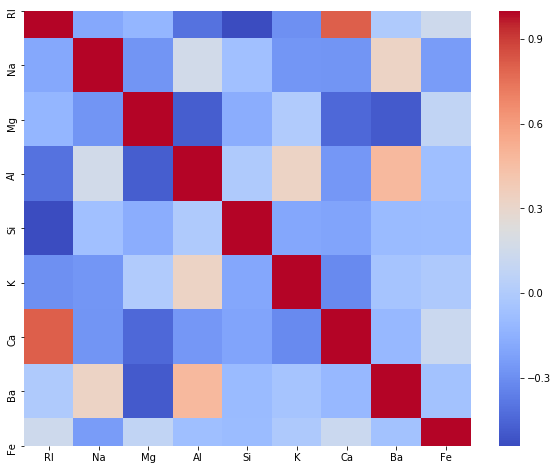

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(gd.drop('Type',axis=1).corr(),cmap='coolwarm')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# We have to standardize the data features
X = gd.drop('Type',axis=1)
y = gd['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 30% for testing model

In [47]:
scaler = StandardScaler()

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [51]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Lets evaluate this model to check accuracy 

In [52]:
y_pred = knn_model.predict(scaled_X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
print("Model Accuracy :{:.2f}".format(accuracy_score(y_test,y_pred)))

Model Accuracy :0.65


In [55]:
confusion_matrix(y_test,y_pred)

array([[15,  4,  0,  0,  0,  0],
       [ 8, 14,  0,  0,  1,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 1,  3,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  1,  8]], dtype=int64)

In [56]:
print(classification_report(y_test,y_pred,labels=pd.unique(y_pred)))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67        19
           7       1.00      0.80      0.89        10
           2       0.58      0.61      0.60        23
           6       0.60      1.00      0.75         3
           5       1.00      0.33      0.50         6

   micro avg       0.65      0.69      0.67        61
   macro avg       0.75      0.71      0.68        61
weighted avg       0.69      0.69      0.66        61



In [57]:
### Let us now find a reasonable K value

In [63]:
accuracy = []


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    accuracy.append(accuracy_score(y_test,y_pred_test))

Text(0.5, 0, 'K Value')

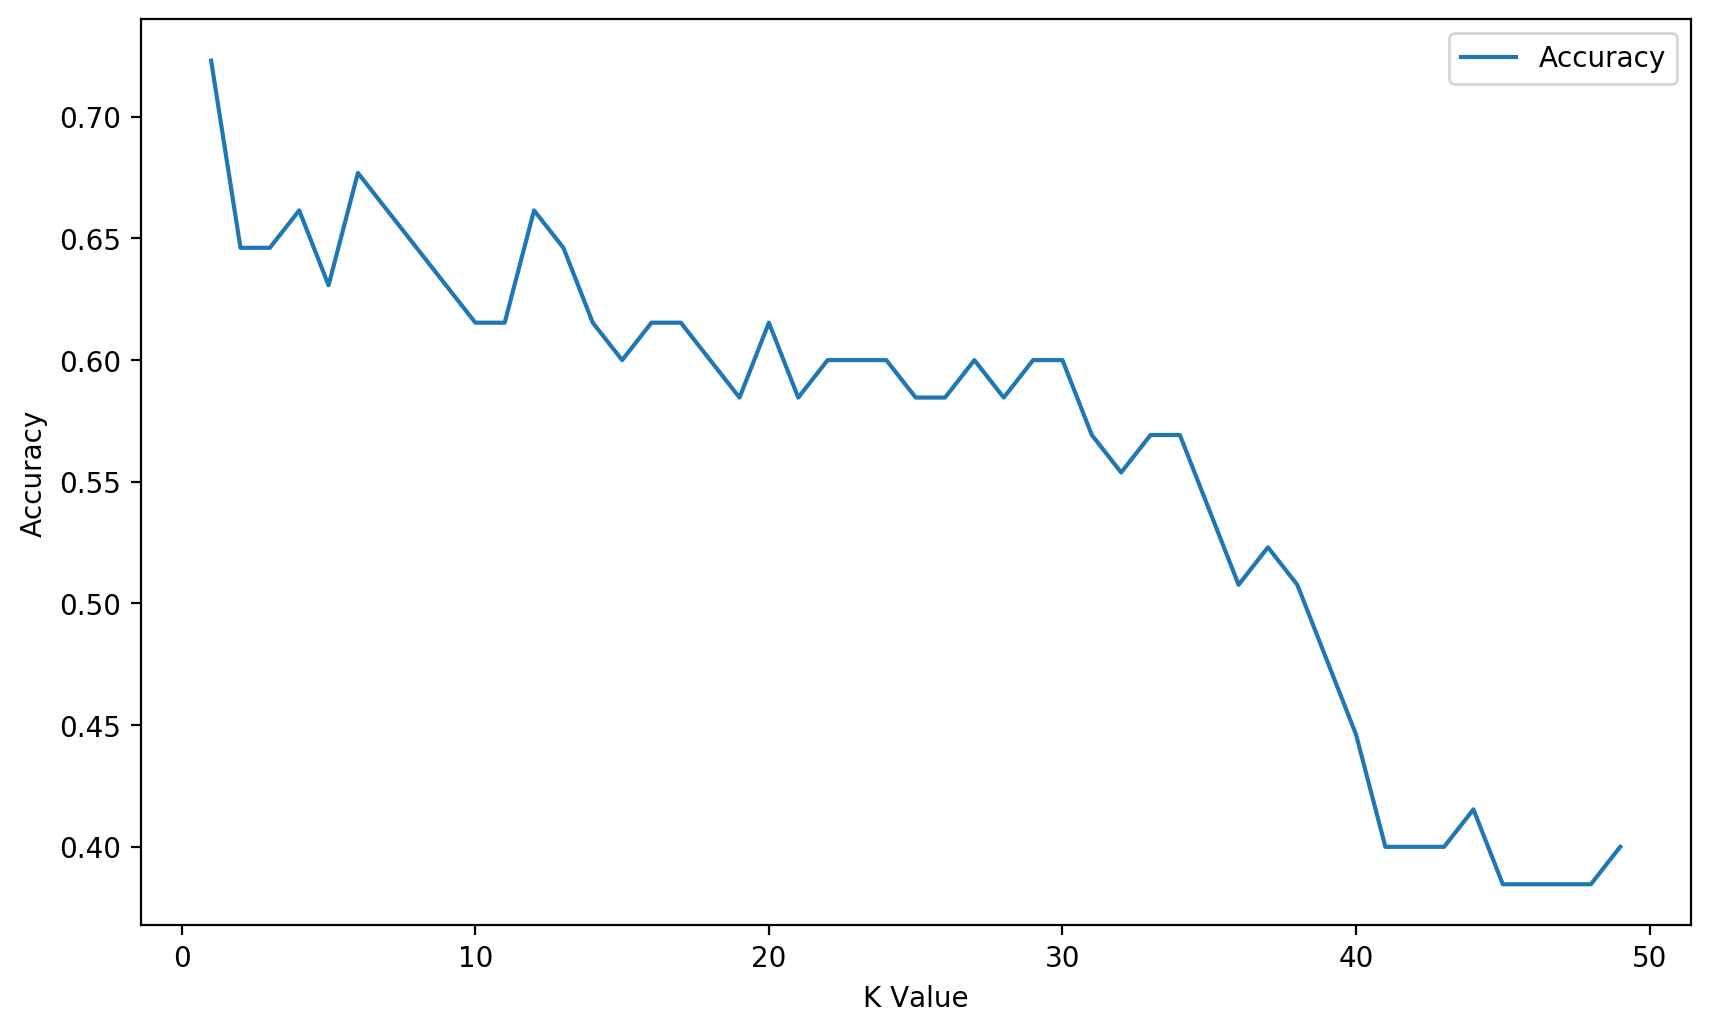

In [64]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,50),accuracy,label='Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel("K Value")

### From above fig we can say that K value of 1 has more accuracy

In [65]:
#So lets create model with k =1 and find accracy score

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [70]:
y_pred = knn_model.predict(scaled_X_test)

In [71]:
print("Model Accuracy :{:.2f}".format(accuracy_score(y_test,y_pred)))

Model Accuracy :0.72


In [72]:
confusion_matrix(y_test,y_pred)

array([[16,  2,  1,  0,  0,  0],
       [ 6, 15,  1,  0,  1,  0],
       [ 1,  1,  2,  0,  0,  0],
       [ 0,  4,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  1,  9]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred,labels=pd.unique(y_pred)))

              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           7       1.00      0.90      0.95        10
           2       0.68      0.65      0.67        23
           6       0.60      1.00      0.75         3
           5       1.00      0.33      0.50         6
           3       0.50      0.50      0.50         4

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



### From Above report we can say that our model can predict type(1,7,2) glasses more accurately